In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
%matplotlib notebook

## Problem 1
Write a function which implements Euler's method. Test your function on the IVP:
$$\begin{align}
	\begin{split}
		x' (t)&= x(t) - 2t + 4,\quad 0 \leq t \leq 2, \\
		x(0) &= 0,
	\end{split}
\end{align}$$

where the analytic solution is $x(t) = -2+2t + 2e^t$.

Use the Euler method to numerically approximate the solution with step sizes $h = 0.2, 0.1$, and $0.05.$  Plot the true solution alongside the three approximations.

In [23]:
def euler(f,x0,t):
    """Numerically approximates the solution to the IVP:
    
    x'(t) = f(x(t),t)
    x(t0) = x0
    
    using the Euler method.
    Parameters:
        f (function): The right-hand side of the ODE
        x0 ((m,) ndarray): The initial condition
        t ((n,) ndarray): The array of time values
    Returns:
        ((n,m) ndarray): The approximate solution, where x[i] â‰ˆ x(t_i)
    """
    #Initialize
    x_old = x0
    t_old = t[0]
    sol = [x_old]
    for t_new in t[1:]:
        #Get h
        h = t_new - t_old
        
        #Euler update
        x_new = x_old + h*f(x_old, t_old)
        
        #Setup for next loop
        sol.append(x_new)
        x_old = x_new
        t_old = t_new
        
    return np.array(sol)

In [24]:
#Test euler()
f = lambda x, t: x - 2*t + 4
x0 = 0

#Get and plot Euler approximations
for h, col, cap in zip([0.2, 0.1, 0.05], ["blue", "orange", "green"], ["h=0.2", "h=0.1", "h=0.05"]):
    t = np.linspace(0, 2, int(2/h)+1)
    sol = euler(f, x0, t)
    plt.plot(t, sol, color=col, label=cap)
    
#Plot analytic solution
g = lambda t: -2 + 2*t + 2*np.exp(t)
t = np.linspace(0, 2, 100)
gt = g(t)
plt.plot(t, gt, color="red", label="Analytic Solution", linestyle="--")
                  
plt.legend(loc="upper left")
plt.xlabel("t")
plt.ylabel("x")
plt.title("Euler's Method")
plt.show()

<IPython.core.display.Javascript object>

## Problem 2

Write functions that implement the midpoint and fourth-order Runge-Kutta methods. Then, consider again the IVP from Problem 1. Use the Euler, Midpoint, and RK4 methods to approximate the value of the solution for step sizes of $h = 0.2,$ $ 0.1,$ $0.05 $, $0.025,$ and $0.0125.$ Plot the true solution alongside the approximation obtained from each method when $h=0.2$. Then, use `plt.loglog` to create a log-log plot of the relative error $|x(2)-x_n|/{|x(2)|}$ as a function of $h$ for each approximation.

In [25]:
def midpoint(f,x0,t):
    """Numerically approximates the solution to the IVP:
    
    x'(t) = f(x(t),t)
    x(t0) = x0
    
    using the midpoint method.
    Parameters:
        f (function): The right-hand side of the ODE
        x0 ((m,) ndarray): The initial condition
        t ((n,) ndarray): The array of time values
    Returns:
        ((n,m) ndarray): The approximate solution, where x[i] â‰ˆ x(t_i)
    """
    #Initialize
    x_old = x0
    t_old = t[0]
    sol = [x_old]
    for t_new in t[1:]:
        #Get h
        h = t_new - t_old
        
        #Midpoint update
        x_new = x_old + h*f(x_old + h/2*f(x_old, t_old), t_old + h/2)
        
        #Setup for next loop
        sol.append(x_new)
        x_old = x_new
        t_old = t_new
        
    return np.array(sol)

def rk4(f,x0,t):
    """Numerically approximates the solution to the IVP:
    
    x'(t) = f(x(t),t)
    x(t0) = x0
    
    using a fourth-order Runge-Kutta method.
    Parameters:
        f (function): The right-hand side of the ODE
        x0 ((m,) ndarray): The initial condition
        t ((n,) ndarray): The array of time values
    Returns:
        ((n,m) ndarray): The approximate solution, where x[i] â‰ˆ x(t_i)
    """
    #Initialize
    x_old = x0
    t_old = t[0]
    sol = [x_old]
    for t_new in t[1:]:
        #Get h
        h = t_new - t_old
        
        #Get Ks
        K1 = f(x_old, t_old)
        K2 = f(x_old + h/2*K1, t_old + h/2)
        K3 = f(x_old + h/2*K2, t_old + h/2)
        K4 = f(x_old + h*K3, t_new)
        
        #RK4 update
        x_new = x_old + h/6*(K1 + 2*K2 + 2*K3 + K4)
        
        #Setup for next loop
        sol.append(x_new)
        x_old = x_new
        t_old = t_new
        
    return np.array(sol)

<IPython.core.display.Javascript object>


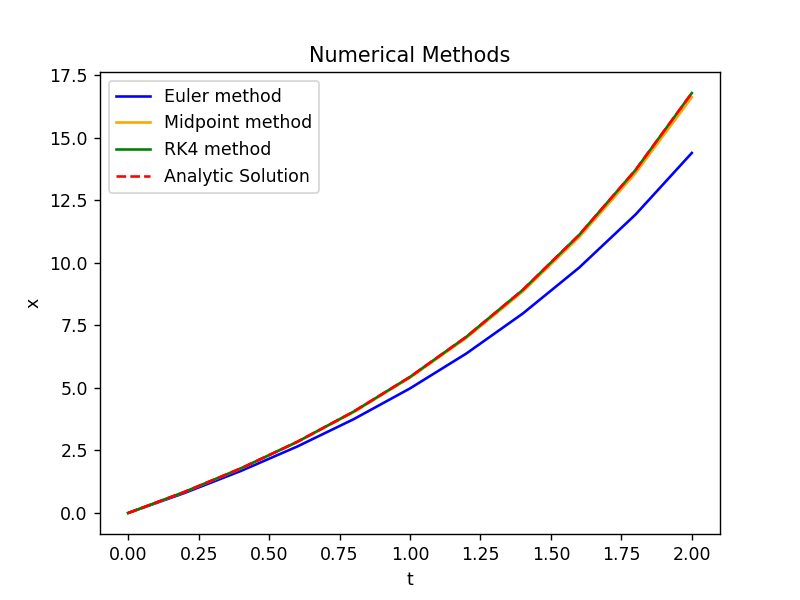

In [26]:
#Setup
plt.close()
f = lambda x, t: x - 2*t + 4
x0 = 0
h = 0.2
t = np.linspace(0, 2, int(2/h)+1)

#Get approximate solutions
x_euler = euler(f, x0, t)
x_mid = midpoint(f, x0, t)
x_rk4 = rk4(f, x0, t)

#Get analytic solution
g = lambda t: -2 + 2*t + 2*np.exp(t)
gt = g(t)

#Plot approximations
plt.plot(t, x_euler, color="Blue", label="Euler method")
plt.plot(t, x_mid, color="Orange", label="Midpoint method")
plt.plot(t, x_rk4, color="green", label="RK4 method")

#Plot analytic
plt.plot(t, gt, color="red", linestyle="--", label="Analytic Solution")


plt.legend()
plt.xlabel("t")
plt.ylabel("x")
plt.title("Numerical Methods")
plt.show()

<IPython.core.display.Javascript object>


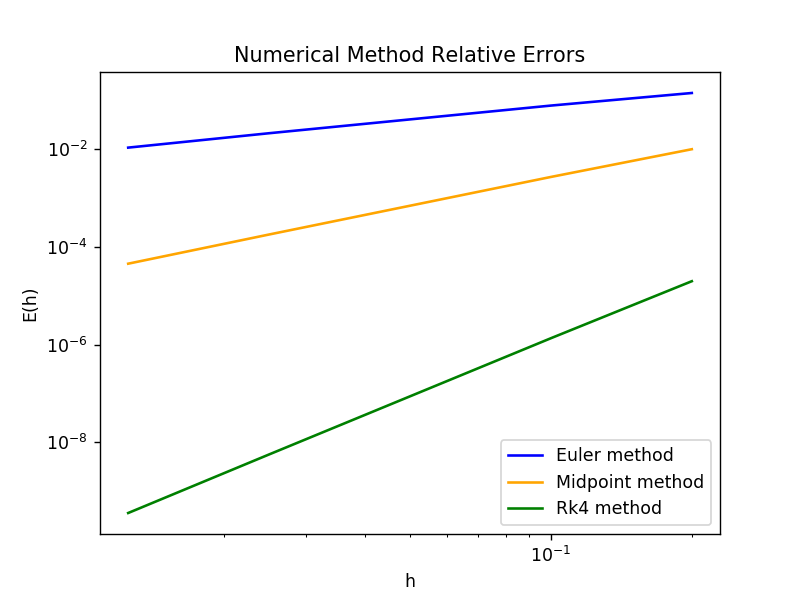

In [27]:
plt.close()

#Setup
euler_errors = []
mid_errors = []
rk4_errors = []
hs = [0.0125, 0.025, 0.1, 0.2]
x2 = g(2) #Analytic solution at 2
for h in hs:
    t = np.linspace(0, 2, int(2/h)+1)

    #Get approximate solutions at 2, calculate errors and add to error lists
    euler_errors.append(np.abs(euler(f, x0, t)[-1]-x2)/x2)
    mid_errors.append(np.abs(midpoint(f, x0, t)[-1]-x2)/x2)
    rk4_errors.append(np.abs(rk4(f, x0, t)[-1]-x2)/x2)
    
    
#Make plot
plt.loglog(hs, euler_errors, color="Blue", label="Euler method")
plt.loglog(hs, mid_errors, color="Orange", label="Midpoint method")
plt.loglog(hs, rk4_errors, color="Green", label="Rk4 method")
plt.legend(loc="lower right")
plt.xlabel("h")
plt.ylabel("E(h)")
plt.title("Numerical Method Relative Errors")
plt.show()

## Problem 3

Use the RK4 method to solve for the simple harmonic oscillator satisfying:
$$\begin{align}
	\begin{split}
&{}my'' + ky = 0,\quad 0 \leq t \leq 20, \\
&{}y(0) = 2, \quad
y'(0) = -1,
	\end{split}
\end{align}$$

<IPython.core.display.Javascript object>


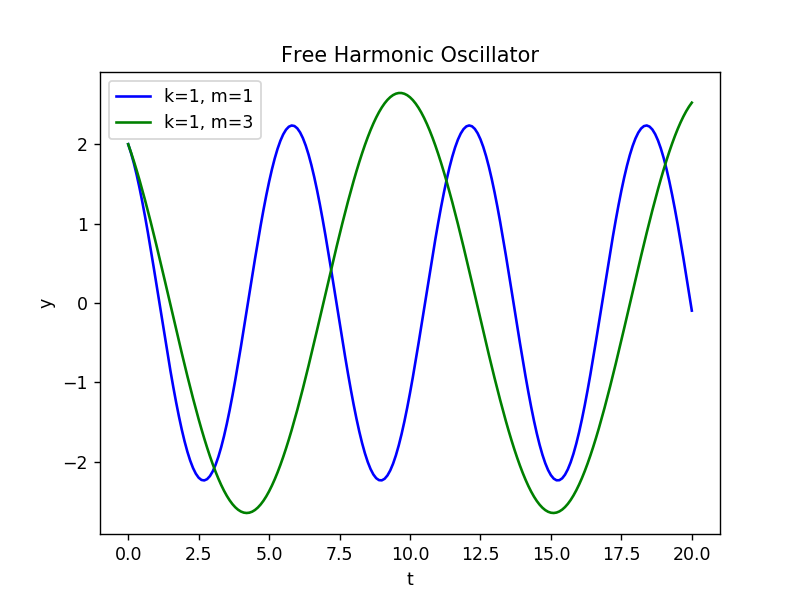

In [28]:
#Setup
plt.close()
k = m = 1
f = lambda x, t: np.array([x[1], -k/m*x[0]])
x0 = np.array([2, -1])
h = 0.01
t = np.linspace(0, 20, int(2/h)+1)

#Get approximate solutions
x_rk4 = rk4(f, x0, t)

#Make plot
plt.plot(t, x_rk4[:, 0], color="Blue", label="k=1, m=1")


m=3
k=1
f = lambda x, t: np.array([x[1], -k/m*x[0]])
x0 = np.array([2, -1])
h = 0.01
t = np.linspace(0, 20, int(2/h)+1)

#Get approximate solutions
x_rk4 = rk4(f, x0, t)

#Make plot
plt.plot(t, x_rk4[:, 0], color="Green", label="k=1, m=3")

plt.xlabel("t")
plt.ylabel("y")
plt.legend(loc="upper left")
plt.title("Free Harmonic Oscillator")
plt.show()

#The solutions make sense physically because the second object has more mass (i.e. more inertia) meaning it takes more 
#effort (force) to alter its trajectory (by Newton's first law).

## Problem 4

Use the RK4 method to solve for the damped free harmonic oscillator satisfying 
$$\begin{align*}
&{}y'' +\gamma y'+ y = 0, \quad 0 \leq t \leq 20,\\
&{}y(0) = 1, \quad
y'(0) = -1.
\end{align*}$$
For $\gamma = 1/2,$ and $\gamma = 1$, simultaneously plot your numerical approximations of $y$.

In [29]:
#Setup
plt.close()
k = m = 1
gamma=1/2
f = lambda x, t: np.array([x[1], -(gamma*x[1]+k*x[0])/m])
x0 = np.array([1, -1])
h = 0.01
t = np.linspace(0, 20, int(2/h)+1)

#Get approximate solutions
x_rk4 = rk4(f, x0, t)

#Make plot
plt.plot(t, x_rk4[:, 0], color="Blue", label=r"$\gamma$=1/2")

gamma=1
f = lambda x, t: np.array([x[1], -(gamma*x[1]+k*x[0])/m])
x0 = np.array([1, -1])
h = 0.01
t = np.linspace(0, 20, int(2/h)+1)

#Get approximate solutions
x_rk4 = rk4(f, x0, t)

#Make plot
plt.plot(t, x_rk4[:, 0], color="Green", label=r"$\gamma$=1")

plt.xlabel("t")
plt.ylabel("y")
plt.legend(loc="upper right")
plt.title("Damped Harmonic Oscillator")
plt.show()

<IPython.core.display.Javascript object>

## Problem 5

Use the RK4 method to solve for the damped and forced harmonic oscillator satisfying 
\begin{align}
	\begin{split}
&{}2y'' + \gamma y' + 2y = 2 \cos (\omega t), \quad 0 \leq t \leq 40,\\
&{}y(0) = 2, \quad
y'(0) = -1. 
	\end{split}
	\label{ivp:damped_forced_oscillator}
\end{align}
For the following values of $\gamma$ and $\omega,$ plot your numerical approximations of $y(t)$: $(\gamma, \omega) = (0.5, 1.5),$ $(0.1, 1.1),$ and $(0, 1)$.

In [30]:
#Setup
plt.close()
m=2
k=2
x0 = np.array([2, -1])
gammas = [0.5, 0.1, 0]
omegas = [1.5, 1.1, 1]
colors = ["Black", "Blue", "Green"]
labels = [r"$\gamma$=.5, $\omega$=1.5", r"$\gamma$=.1, $\omega$=1.1", "$\gamma$=0, $\omega$=1"]
for gamma, omega, color, label in zip(gammas, omegas, colors, labels):
    f = lambda x, t: np.array([x[1], (2*np.cos(omega*t) - gamma*x[1] - k*x[0])/m])
    h = 0.01
    t = np.linspace(0, 40, int(2/h)+1)

    #Get approximate solutions
    x_rk4 = rk4(f, x0, t)

    #Make plot
    plt.plot(t, x_rk4[:, 0], color=color, label=label)

plt.xlabel("t")
plt.ylabel("y")
plt.legend(loc="upper left")
plt.title("Forced and Damped Harmonic Oscillator")
plt.show()

<IPython.core.display.Javascript object>